## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
def csv_drive_path_generator(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

## **Loading files**

In [ ]:
path = csv_drive_path_generator("https://drive.google.com/file/d/1DIsPvP0VvrAaZUtSOwLyX5PICwUxsBwa/view?usp=sharing")
X = pd.read_csv(path)
X = X.drop(["Unnamed: 0"], axis=1)
X.shape

(3722, 10)

In [ ]:
path = csv_drive_path_generator("https://drive.google.com/file/d/1qxn6N6WP_eKnMRJYtvk8RmZeJ5PivV_k/view?usp=sharing")
y = pd.read_csv(path)
y = y.drop(["Unnamed: 0"], axis=1)
y.shape

(3722, 1)

In [ ]:
df = X
df['LeaveOrNot'] = y['LeaveOrNot']

In [ ]:
X.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,0
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,0
2,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,1


In [ ]:
y.head(3)

,LeaveOrNot
0,0
1,0
2,1


# **EDA**

## **Common data info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  3722 non-null   object 
 1   JoiningYear                3722 non-null   int64  
 2   City                       3722 non-null   object 
 3   PaymentTier                3722 non-null   int64  
 4   Age                        3720 non-null   float64
 5   Gender                     3720 non-null   object 
 6   EverBenched                3722 non-null   object 
 7   ExperienceInCurrentDomain  3722 non-null   int64  
 8   id                         3722 non-null   int64  
 9   Race                       3722 non-null   object 
 10  LeaveOrNot                 3722 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 320.0+ KB


In [ ]:
nan_indexes = df[df["Age"].isnull() | df["Gender"].isnull()]
df.drop(nan_indexes.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3720 entries, 0 to 3721
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  3720 non-null   object 
 1   JoiningYear                3720 non-null   int64  
 2   City                       3720 non-null   object 
 3   PaymentTier                3720 non-null   int64  
 4   Age                        3720 non-null   float64
 5   Gender                     3720 non-null   object 
 6   EverBenched                3720 non-null   object 
 7   ExperienceInCurrentDomain  3720 non-null   int64  
 8   id                         3720 non-null   int64  
 9   Race                       3720 non-null   object 
 10  LeaveOrNot                 3720 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 348.8+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,id,LeaveOrNot
count,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000
mean,2015.075538,2.696774,30.928763,2.898656,2349.169086,0.351075
std,1.864874,0.558000,4.860963,1.562087,1335.856993,0.477371
min,2012.000000,1.000000,23.000000,0.000000,4.000000,0.000000
25%,2014.000000,2.000000,27.000000,2.000000,1207.750000,0.000000
50%,2015.000000,3.000000,29.000000,3.000000,2367.500000,0.000000
75%,2017.000000,3.000000,34.000000,4.000000,3497.250000,1.000000
max,2018.000000,3.000000,43.000000,7.000000,4651.000000,1.000000


## **Features exploration**

### **Education COL**

In [ ]:
df['Education'].unique()

array(['Bachelors', 'PHD', 'Masters'], dtype=object)

In [ ]:
# check if there are nulls
df['Education'].size - df['Education'].count()

0

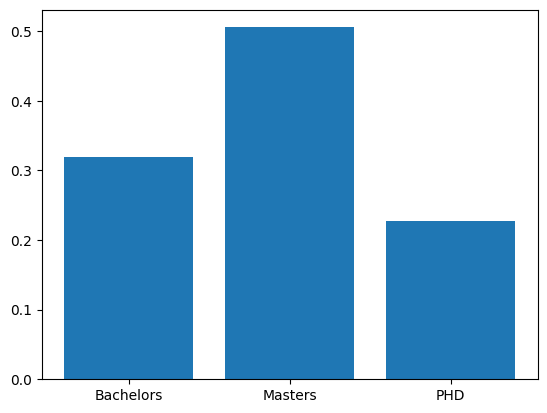

In [ ]:
education = df[['Education', 'LeaveOrNot']].groupby("Education").mean()

# prob of LeaveOrNot for Education
plt.bar(education.index, education['LeaveOrNot'])
plt.show()

<Axes: xlabel='Education', ylabel='count'>

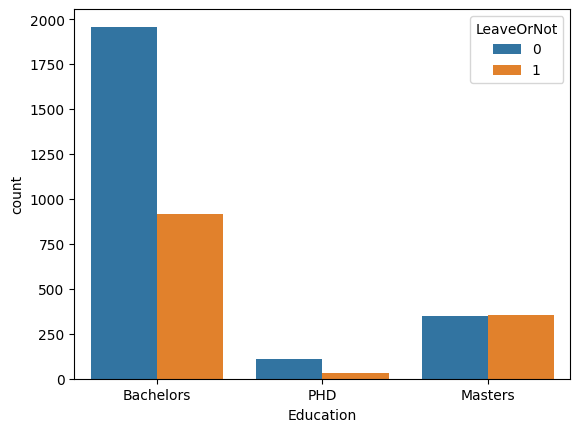

In [ ]:
sns.countplot(data = df, x='Education', hue='LeaveOrNot')

### **JoiningYear COL**

In [ ]:
df['JoiningYear'].unique()

array([2016, 2012, 2015, 2017, 2014, 2013, 2018])

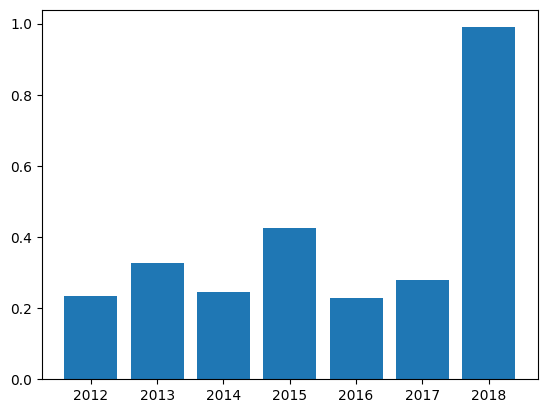

In [ ]:
joiningYear = df[['JoiningYear', 'LeaveOrNot']].groupby("JoiningYear").mean()

# prob of LeaveOrNot for Education
plt.bar(joiningYear.index, joiningYear['LeaveOrNot'])
plt.show()

In [ ]:
df.groupby("JoiningYear").count()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot
JoiningYear,,,,,,,,,,
2012,399,399,399,399,399,399,399,399,399,399
2013,530,530,530,530,530,530,530,530,530,530
2014,565,565,565,565,565,565,565,565,565,565
2015,615,615,615,615,615,615,615,615,615,615
2016,415,415,415,415,415,415,415,415,415,415
2017,900,900,900,900,900,900,900,900,900,900
2018,296,296,296,296,296,296,296,296,296,296


<Axes: xlabel='JoiningYear', ylabel='count'>

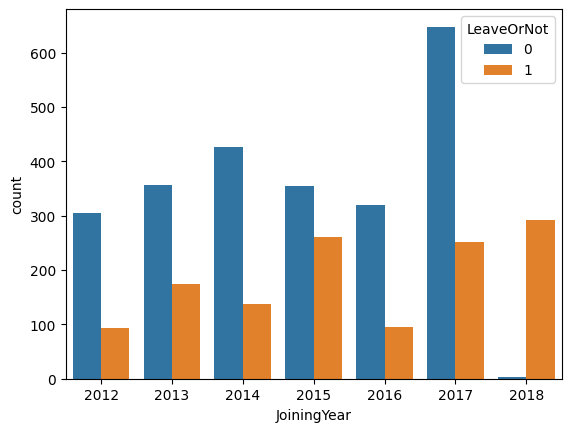

In [ ]:
sns.countplot(data = df, x='JoiningYear', hue='LeaveOrNot')

### **City COL**

In [ ]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

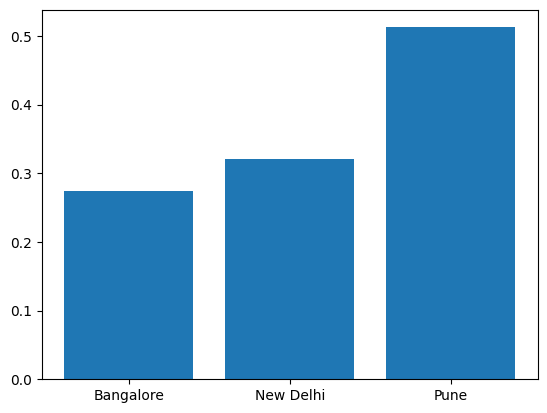

In [ ]:
City = df[['City', 'LeaveOrNot']].groupby("City").mean()

# prob of LeaveOrNot for Education
plt.bar(City.index, City['LeaveOrNot'])
plt.show()

<Axes: xlabel='City', ylabel='count'>

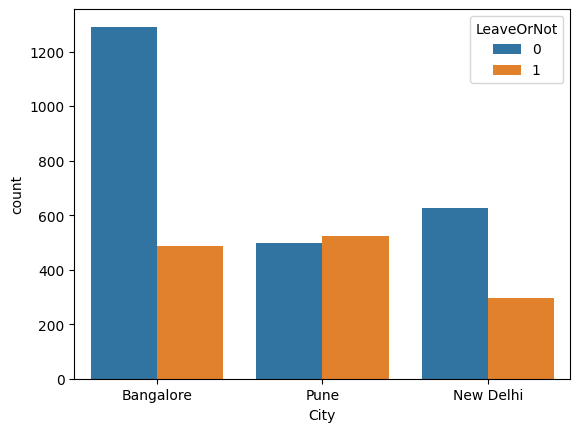

In [ ]:
sns.countplot(data = df ,x='City',hue='LeaveOrNot')

### **PaymentTier Col**

In [ ]:
df['PaymentTier'].unique()

array([3, 2, 1])

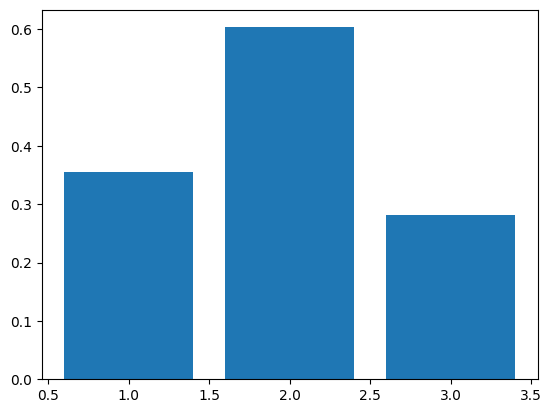

In [ ]:
PaymentTier = df[['PaymentTier', 'LeaveOrNot']].groupby("PaymentTier").mean()

# prob of LeaveOrNot for Education
plt.bar(PaymentTier.index, PaymentTier['LeaveOrNot'])
plt.show()

<Axes: xlabel='PaymentTier', ylabel='count'>

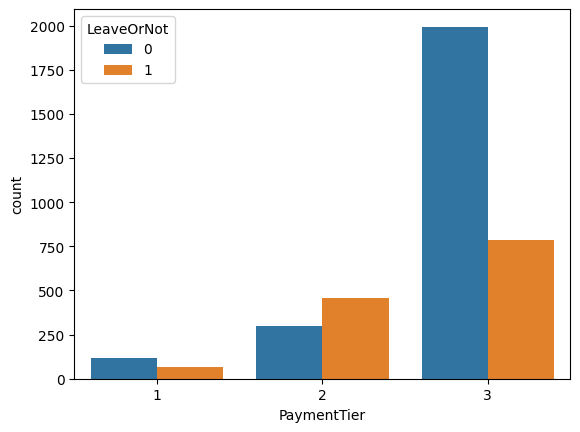

In [ ]:
sns.countplot(data = df ,x='PaymentTier',hue='LeaveOrNot')

### **Age COL**

In [ ]:
df["Age"].unique()

array([27., 28., 26., 29., 24., 40., 23., 42., 37., 35., 30., 33., 32.,
       39., 41., 31., 34., 25., 36., 38., 43.])

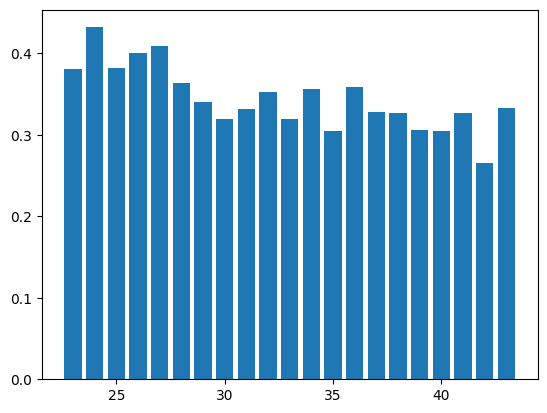

In [ ]:
Age = df[["Age", "LeaveOrNot"]].groupby("Age").mean()

# prob of LeaveOrNot for Age
plt.bar(Age.index, Age['LeaveOrNot'])
plt.show()

<Axes: xlabel='Age', ylabel='count'>

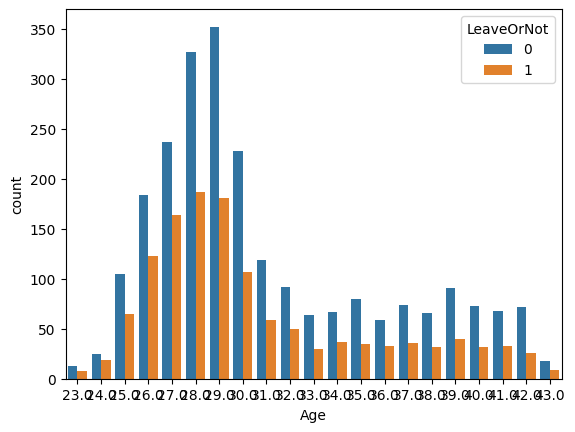

In [ ]:
sns.countplot(data = df ,x='Age',hue='LeaveOrNot')

### **Gender COL**

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

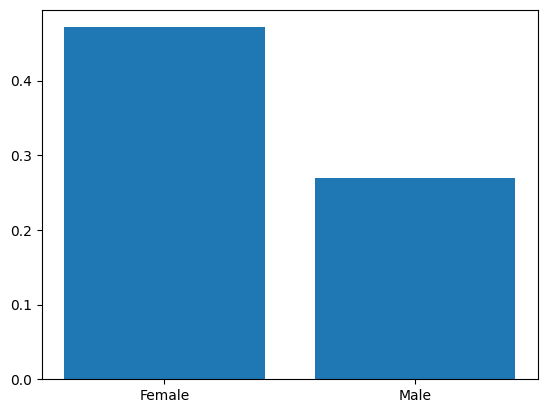

In [ ]:
gender = df[["Gender", "LeaveOrNot"]].groupby("Gender").mean()
plt.bar(gender.index, gender["LeaveOrNot"])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

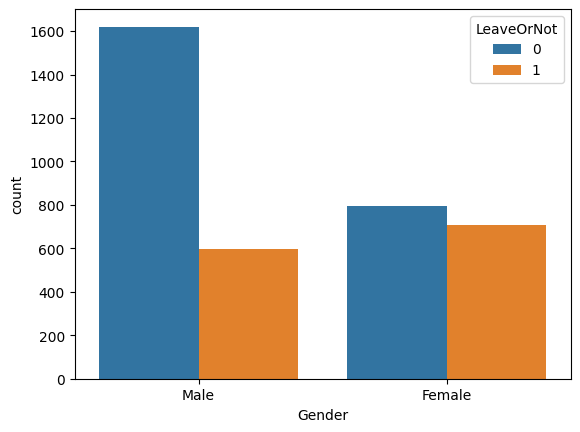

In [ ]:
sns.countplot(data = df ,x='Gender',hue='LeaveOrNot')

### **EverBenched COL**

In [ ]:
df["EverBenched"].unique()

array(['Yes', 'No'], dtype=object)

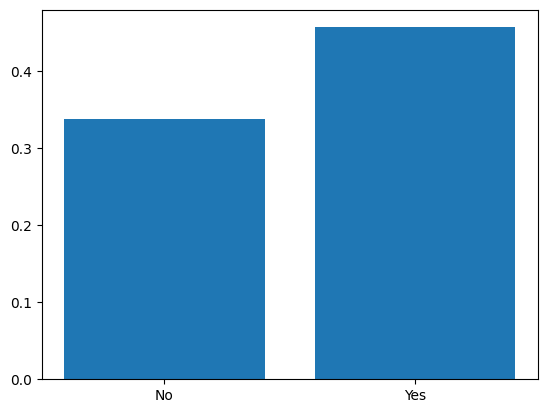

In [ ]:
everbenched = df[["EverBenched", "LeaveOrNot"]].groupby("EverBenched").mean()
plt.bar(everbenched.index, everbenched["LeaveOrNot"])
plt.show()

<Axes: xlabel='EverBenched', ylabel='count'>

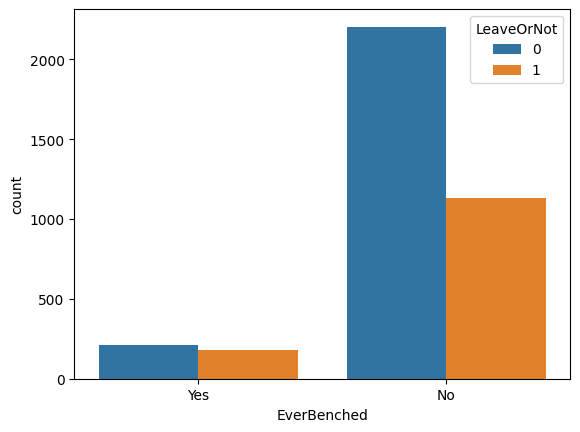

In [ ]:
sns.countplot(data = df ,x='EverBenched',hue='LeaveOrNot')

### **ExperienceInCurrentDomain COL**

In [ ]:
df["ExperienceInCurrentDomain"].unique()

array([4, 2, 1, 0, 5, 3, 6, 7])

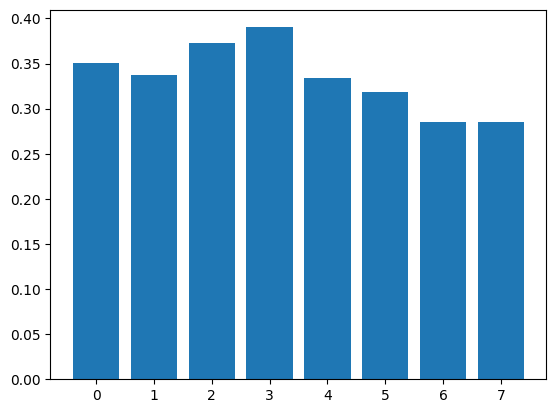

In [ ]:
ExperienceInCurrentDomain = df[["ExperienceInCurrentDomain", "LeaveOrNot"]].groupby("ExperienceInCurrentDomain").mean()
plt.bar(ExperienceInCurrentDomain.index, ExperienceInCurrentDomain["LeaveOrNot"])
plt.show()

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

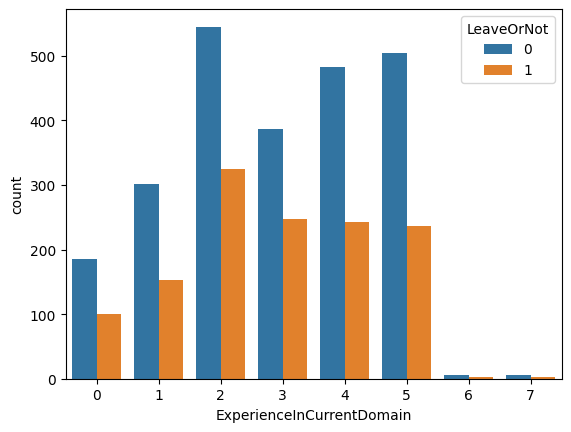

In [ ]:
sns.countplot(data = df ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

### **id COL**

In [ ]:
df["id"].nunique()

3720

In [ ]:
df.shape

(3720, 14)

### **Race COL**

In [ ]:
df["Race"].unique()

array(['white', 'black', 'yellow', 'red'], dtype=object)

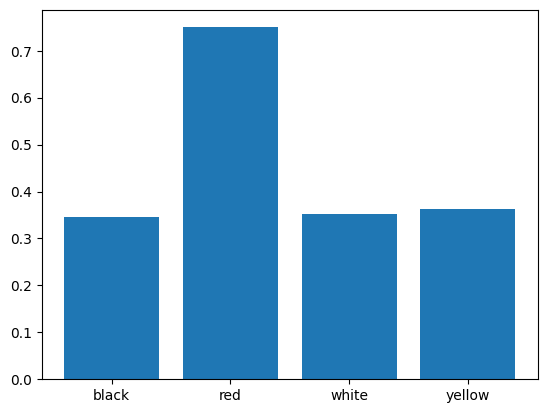

In [ ]:
race = df[["Race", "LeaveOrNot"]].groupby("Race").mean()
plt.bar(race.index, race["LeaveOrNot"])
plt.show()

<Axes: xlabel='Race', ylabel='count'>

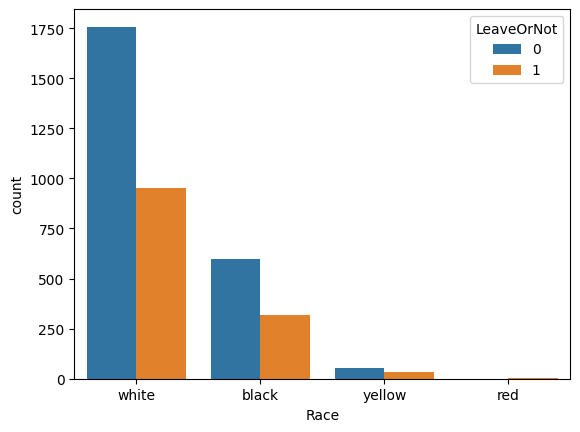

In [ ]:
sns.countplot(data = df ,x='Race',hue='LeaveOrNot')

# **PreProcessing**

In [ ]:
X = df.drop(columns=['LeaveOrNot', 'id'])
y = df['LeaveOrNot']

In [ ]:
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,white
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,white
2,Bachelors,2015,Pune,3,26.0,Female,No,2,white
3,Bachelors,2012,Bangalore,3,29.0,Male,No,1,black
4,Bachelors,2016,Bangalore,3,24.0,Male,No,0,white


In [ ]:
def make_preprocessing(df):
  binary_cat = ['Gender', 'EverBenched']
  ordinal_cat = ['Bachelors', 'Masters', 'PHD']
  multi_cat = ['Education', 'JoiningYear', 'PaymentTier', 'ExperienceInCurrentDomain', 'City', 'Race']

  onehot_pipeline = Pipeline([
      ('one_hot_encoder', OneHotEncoder(sparse_output=False))
  ])

  binary_pipeline = Pipeline([
      ('bin_one_hot_encoder', OneHotEncoder(drop='first', sparse_output=False))
  ])

  preprocess_pipeline = ColumnTransformer(
      transformers=[
          ('multi_cat', onehot_pipeline, multi_cat),
          ('binary_cat', binary_pipeline, binary_cat),
          ('scaler', MinMaxScaler(), ['Age'])
      ],
      remainder='passthrough'  # Keep remaining columns unchanged
  )

  X_transformed = preprocess_pipeline.fit_transform(X)
  feature_names = preprocess_pipeline.get_feature_names_out()
  transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
  return transformed_df

In [ ]:
X_transformed_df = make_preprocessing(X)
X_transformed_df.head()

,multi_cat__Education_Bachelors,multi_cat__Education_Masters,multi_cat__Education_PHD,multi_cat__JoiningYear_2012,multi_cat__JoiningYear_2013,multi_cat__JoiningYear_2014,multi_cat__JoiningYear_2015,multi_cat__JoiningYear_2016,multi_cat__JoiningYear_2017,multi_cat__JoiningYear_2018,...,multi_cat__City_Bangalore,multi_cat__City_New Delhi,multi_cat__City_Pune,multi_cat__Race_black,multi_cat__Race_red,multi_cat__Race_white,multi_cat__Race_yellow,binary_cat__Gender_Male,binary_cat__EverBenched_Yes,scaler__Age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.20
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.25
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.15
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.30
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.05


# **Models Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.3, random_state=42)

## **Model 1 - Logistic Regression**

In [ ]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

Train CV f1:  0.6426786836090697
Test f1: 0.6686390532544378


<ipython-input-274-826b72af76de>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


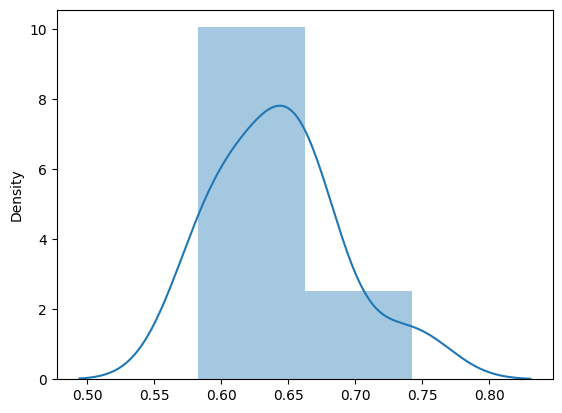

In [ ]:
# lg model
lg = LogisticRegression()

# cross validation
cv = cross_val_score(lg, X_train, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('Train CV f1: ', cv.mean())

# test scoring
lg.fit(X_train, y_train)
print('Test f1:', f1_score(y_test, lg.predict(X_test)))

In [ ]:
# using optimization tool
!pip install optuna
import optuna

In [ ]:
# implementing optuna optimization for feature-selection

def objective(trial):
    # Get feature selection trial (0 means exclude, 1 means include)
    feature_index = [trial.suggest_int(f'feature_{i}', 0, 1) for i in range(X_train.shape[1])]

    # Select columns based on feature_index
    X_filtered = X_train.iloc[:, [i for i, use_feature in enumerate(feature_index) if use_feature == 1]]

    # Handle case where no features are selected
    if X_filtered.shape[1] == 0:
        return 0.0  # Return a score of 0 for invalid feature selection

    # Initialize the Logistic Regression model
    model = LogisticRegression()

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_filtered, y_train, cv=3, scoring='f1').mean()

    # Return the score to maximize it
    return score

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best weights
print("Best feature weights:", study.best_params)
print("Best f1:", study.best_value)

[I 2024-11-15 15:45:30,226] A new study created in memory with name: no-name-1aa073a9-8354-484b-aef4-01505b4d4432
[I 2024-11-15 15:45:30,282] Trial 0 finished with value: 0.6471271253798386 and parameters: {'feature_0': 1, 'feature_1': 1, 'feature_2': 1, 'feature_3': 1, 'feature_4': 1, 'feature_5': 1, 'feature_6': 0, 'feature_7': 0, 'feature_8': 1, 'feature_9': 1, 'feature_10': 1, 'feature_11': 1, 'feature_12': 1, 'feature_13': 1, 'feature_14': 1, 'feature_15': 0, 'feature_16': 1, 'feature_17': 1, 'feature_18': 0, 'feature_19': 1, 'feature_20': 0, 'feature_21': 0, 'feature_22': 1, 'feature_23': 1, 'feature_24': 0, 'feature_25': 0, 'feature_26': 1, 'feature_27': 0, 'feature_28': 1, 'feature_29': 0, 'feature_30': 0}. Best is trial 0 with value: 0.6471271253798386.
[I 2024-11-15 15:45:30,342] Trial 1 finished with value: 0.6144914360114037 and parameters: {'feature_0': 1, 'feature_1': 0, 'feature_2': 0, 'feature_3': 1, 'feature_4': 1, 'feature_5': 0, 'feature_6': 1, 'feature_7': 1, 'featu

Best feature weights: {'feature_0': 1, 'feature_1': 1, 'feature_2': 0, 'feature_3': 1, 'feature_4': 0, 'feature_5': 1, 'feature_6': 0, 'feature_7': 0, 'feature_8': 1, 'feature_9': 1, 'feature_10': 0, 'feature_11': 1, 'feature_12': 1, 'feature_13': 1, 'feature_14': 0, 'feature_15': 1, 'feature_16': 1, 'feature_17': 0, 'feature_18': 0, 'feature_19': 0, 'feature_20': 0, 'feature_21': 0, 'feature_22': 1, 'feature_23': 1, 'feature_24': 0, 'feature_25': 1, 'feature_26': 0, 'feature_27': 0, 'feature_28': 1, 'feature_29': 0, 'feature_30': 0}
Best f1: 0.6527485518490298


<ipython-input-277-ffcc3b422df1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


Train CV f1:  0.6478105355369095
Test f1:  0.6823529411764706


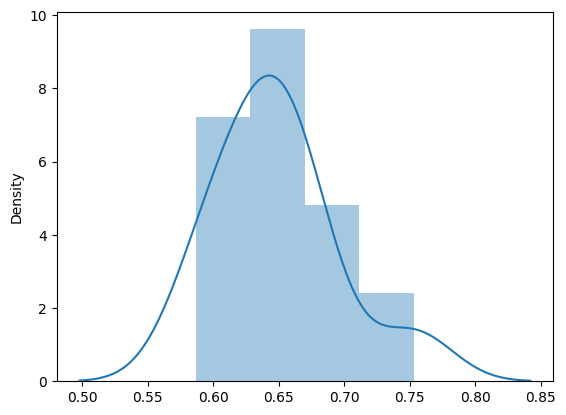

In [ ]:
# checking results of optimization
lg_optimized = LogisticRegression()
feature_selection = [study.best_params[f'feature_{i}'] for i in range(X_train.shape[1])]
X_filtered = X_train.iloc[:, [i for i, use_feature in enumerate(feature_selection) if use_feature == 1]]

cv = cross_val_score(lg_optimized, X_filtered, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('Train CV f1: ', cv.mean())

lg_optimized.fit(X_filtered, y_train)
print('Test f1: ', f1_score(y_test, lg_optimized.predict(X_test.iloc[:, [i for i, use_feature in enumerate(feature_selection) if use_feature == 1]])))

## **Model 2 - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-279-787d603d3d65>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


Train CV f1:  0.6448136165451168
Test f1: 0.6919831223628692


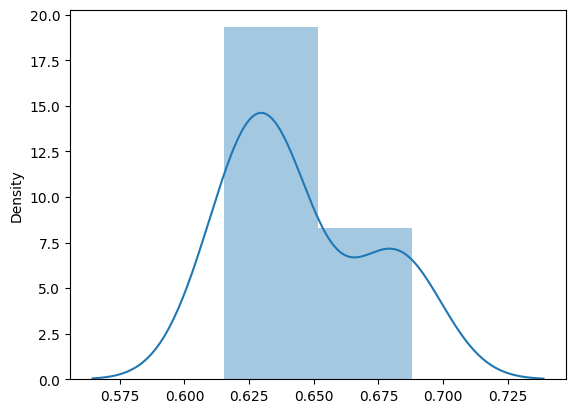

In [ ]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# cross validation
cv = cross_val_score(knn, X_train, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('Train CV f1: ', cv.mean())

# test scoring
knn.fit(X_train, y_train)
print('Test f1:', f1_score(y_test, knn.predict(X_test)))

Best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Best score:  0.6526163049979069


<ipython-input-280-e6e6983f2bea>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring="f1"))


<Axes: ylabel='Density'>

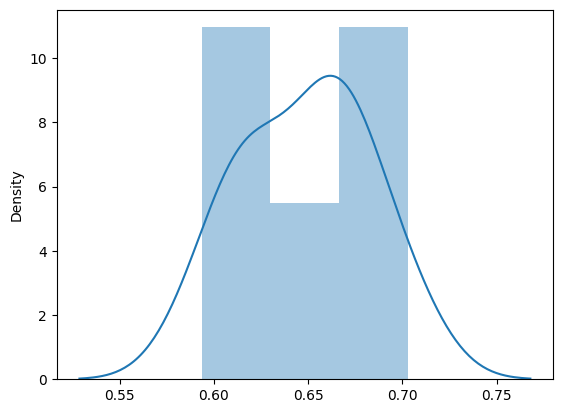

In [ ]:
# gridsearch
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

sns.distplot(cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring="f1"))

In [ ]:
# weighted KNN optimization

n_features = X_train.shape[1]

# Define the objective function for Optuna
def objective(trial):
    # Define a weight for each feature
    weights = [trial.suggest_float(f'weight_{i}', 0.1, 10.0) for i in range(n_features)]

    # Apply the weights to the features
    X_weighted = X_train * weights

    # Initialize the KNN model
    model = KNeighborsClassifier(n_neighbors=trial.suggest_int('n_neighbors', 1, 100), weights=trial.suggest_categorical('weights', ['uniform', 'distance']))

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_weighted, y_train, cv=3, scoring='f1').mean()

    # Return the score to maximize it
    return score

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best weights
print("Best feature weights:", study.best_params)
print("Best f1:", study.best_value)


[I 2024-11-15 15:46:25,464] A new study created in memory with name: no-name-53fd7425-5d76-4c1d-a3e0-09c240aa9230
[I 2024-11-15 15:46:26,002] Trial 0 finished with value: 0.523152216194923 and parameters: {'weight_0': 5.01898776298633, 'weight_1': 2.7478711065390065, 'weight_2': 7.754554890097493, 'weight_3': 8.04161795049749, 'weight_4': 4.366852145601178, 'weight_5': 2.4644700559174333, 'weight_6': 9.074105107147279, 'weight_7': 2.5812858643406775, 'weight_8': 5.996658542628679, 'weight_9': 7.4681317567967, 'weight_10': 1.065681618861657, 'weight_11': 8.474201840156255, 'weight_12': 1.5205104774709364, 'weight_13': 2.92222435341657, 'weight_14': 6.94755814132508, 'weight_15': 4.92224220602189, 'weight_16': 8.709153313940282, 'weight_17': 8.19236584109127, 'weight_18': 1.6716562606093188, 'weight_19': 6.668102448287368, 'weight_20': 1.326034457501838, 'weight_21': 2.4358257350714494, 'weight_22': 0.5887666667572137, 'weight_23': 3.9766818082609845, 'weight_24': 1.070534184799273, 'wei

Best feature weights: {'weight_0': 7.6780027122374666, 'weight_1': 7.8873738093710255, 'weight_2': 9.836065255435331, 'weight_3': 4.711557961743522, 'weight_4': 4.934296744532647, 'weight_5': 7.1888353760140316, 'weight_6': 7.09997875254288, 'weight_7': 5.363423032524132, 'weight_8': 9.375022807672428, 'weight_9': 7.863606096406834, 'weight_10': 7.417127398999584, 'weight_11': 1.29097697542426, 'weight_12': 5.466626545108609, 'weight_13': 5.238206828139189, 'weight_14': 7.247586707470327, 'weight_15': 4.317280524305057, 'weight_16': 0.9663556972881979, 'weight_17': 4.886369861755117, 'weight_18': 4.112520510544045, 'weight_19': 2.0590384659004934, 'weight_20': 5.17980591569097, 'weight_21': 3.012829956011993, 'weight_22': 2.779574831678691, 'weight_23': 6.418660676234904, 'weight_24': 6.418324810631474, 'weight_25': 5.294005145166453, 'weight_26': 2.282108336745447, 'weight_27': 1.7672867185599797, 'weight_28': 7.9505642809938335, 'weight_29': 8.023344512319413, 'weight_30': 9.74016882

<ipython-input-282-b34d1e398755>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


train CV f1:  0.6934358055429496
test f1:  0.7187039764359352


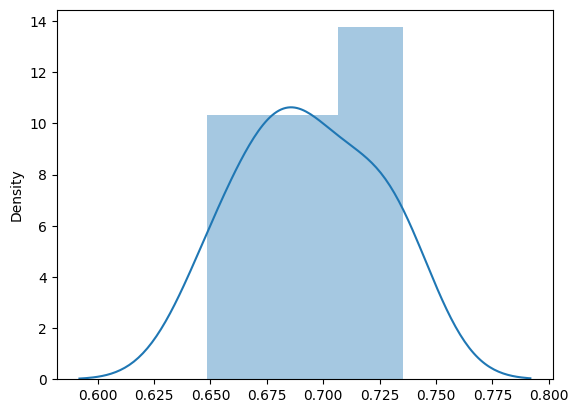

In [ ]:
# checking results of optimization
weighted_features = [study.best_params[f'weight_{i}'] for i in range(n_features)]
X_train_weighted = X_train * weighted_features
knn_optimized = KNeighborsClassifier(n_neighbors=study.best_params['n_neighbors'], weights=study.best_params['weights'])
cv = cross_val_score(knn_optimized, X_train_weighted, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('train CV f1: ', cv.mean())

X_test_weighted = X_test * weighted_features
knn_optimized.fit(X_train_weighted, y_train)
print('test f1: ', f1_score(y_test, knn_optimized.predict(X_test_weighted)))

## **Model 3 - Random Forset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

<ipython-input-284-6155440dddd3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


Train CV f1:  0.6497687765895327
Test f1: 0.6914728682170542


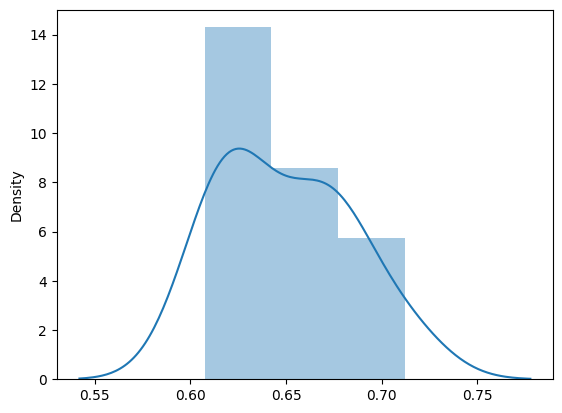

In [ ]:
# rf model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=5)

# cross validation
cv = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('Train CV f1: ', cv.mean())

# test scoring
rf.fit(X_train, y_train)
print('Test f1:', f1_score(y_test, rf.predict(X_test)))

In [ ]:
# hyper-parameters optimization

# Define the objective function for Optuna
def objective(trial):
    # Initialize the RF model
    model = RandomForestClassifier(n_estimators=trial.suggest_int('n_estimators', 10, 200), max_depth=trial.suggest_int('max_depth', 1, 20), max_features=trial.suggest_int('max_features', 1, 14))
    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1').mean()
    # Return the score to maximize it
    return score

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best weights
print("Best feature weights:", study.best_params)
print("Best f1:", study.best_value)

[I 2024-11-15 15:47:18,120] A new study created in memory with name: no-name-29ce58c4-019a-4028-92a8-e6b2f1678746
[I 2024-11-15 15:47:18,839] Trial 0 finished with value: 0.6885438042624865 and parameters: {'n_estimators': 62, 'max_depth': 20, 'max_features': 11}. Best is trial 0 with value: 0.6885438042624865.
[I 2024-11-15 15:47:20,076] Trial 1 finished with value: 0.6659335337268703 and parameters: {'n_estimators': 142, 'max_depth': 20, 'max_features': 2}. Best is trial 0 with value: 0.6885438042624865.
[I 2024-11-15 15:47:21,491] Trial 2 finished with value: 0.6751507658377434 and parameters: {'n_estimators': 166, 'max_depth': 18, 'max_features': 2}. Best is trial 0 with value: 0.6885438042624865.
[I 2024-11-15 15:47:22,400] Trial 3 finished with value: 0.6897506651699757 and parameters: {'n_estimators': 83, 'max_depth': 19, 'max_features': 12}. Best is trial 3 with value: 0.6897506651699757.
[I 2024-11-15 15:47:22,883] Trial 4 finished with value: 0.0 and parameters: {'n_estimator

Best feature weights: {'n_estimators': 182, 'max_depth': 9, 'max_features': 12}
Best f1: 0.7249475236143735


<ipython-input-286-45cd54c8b606>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


train CV f1:  0.7240468203102539
test f1:  0.7847025495750708


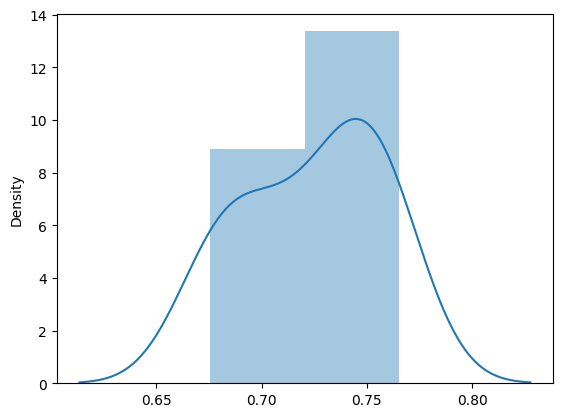

In [ ]:
# checking results of optimization
rf_optimized = RandomForestClassifier(n_estimators=study.best_params['n_estimators'], max_depth=study.best_params['max_depth'], max_features=study.best_params['max_features'])
cv = cross_val_score(rf_optimized, X_train, y_train, cv=10, scoring="f1")
sns.distplot(cv)
print('train CV f1: ', cv.mean())

rf_optimized.fit(X_train, y_train)
print('test f1: ', f1_score(y_test, rf_optimized.predict(X_test)))

## **Models Comparison**

In [ ]:
# checking potential of combining the different model types
combined = pd.DataFrame()
combined['y'] = y_test

X_test_lg = X_test.iloc[:, [i for i, use_feature in enumerate(feature_selection) if use_feature == 1]]
X_test_knn = X_test * weighted_features

combined['lg_optimized'] = lg_optimized.predict(X_test_lg)
combined['knn_optimized'] = knn_optimized.predict(X_test_knn)
combined['rf_optimized'] = rf_optimized.predict(X_test)

all_correct = combined[(combined['y']==combined['lg_optimized']) & (combined['y']==combined['knn_optimized']) & (combined['y']==combined['rf_optimized'])].shape[0]

lg_correct = combined[combined['y']==combined['lg_optimized']].shape[0]
only_lg_correct = combined[(combined['y']==combined['lg_optimized']) & (combined['y']!=combined['knn_optimized']) & (combined['y']!=combined['rf_optimized'])].shape[0]
lg_mistake = combined[combined['y']!=combined['lg_optimized']].shape[0]

knn_correct = combined[combined['y']==combined['knn_optimized']].shape[0]
only_knn_correct = combined[(combined['y']!=combined['lg_optimized']) & (combined['y']==combined['knn_optimized']) & (combined['y']!=combined['rf_optimized'])].shape[0]
knn_mistake = combined[combined['y']!=combined['knn_optimized']].shape[0]

rf_correct = combined[combined['y']==combined['rf_optimized']].shape[0]
only_rf_correct = combined[(combined['y']!=combined['lg_optimized']) & (combined['y']!=combined['knn_optimized']) & (combined['y']==combined['rf_optimized'])].shape[0]
rf_mistake = combined[combined['y']!=combined['rf_optimized']].shape[0]

none_correct = combined[(combined['y']!=combined['lg_optimized']) & (combined['y']!=combined['knn_optimized']) & (combined['y']!=combined['rf_optimized'])].shape[0]
rf_mistake_while_other_correct = combined[(((combined['y']==combined['lg_optimized']) | (combined['y']==combined['knn_optimized'])) & (combined['y']!=combined['rf_optimized']))].shape[0]


print('where all correct: ', all_correct)
print('\t')
print('where lg correct: ', lg_correct)
print('where only lg correct: ', only_lg_correct)
print('where lg mistake: ', lg_mistake)
print('\t')
print('whare knn correct:', knn_correct)
print('where only knn correct: ', only_knn_correct)
print('where knn mistake: ', knn_mistake)
print('\t')
print('where rf correct: ', rf_correct)
print('where only rf correct: ', only_rf_correct)
print('where rf mistake: ', rf_mistake)
print('where rf mistake while other correct: ', rf_mistake_while_other_correct)
print('\t')
print('where none correct:', none_correct)
print('\t')
print('Mistake Reducing Potential: ', (rf_mistake_while_other_correct/rf_mistake)*100,'%')

where all correct:  832
	
where lg correct:  900
where only lg correct:  24
where lg mistake:  216
	
whare knn correct: 925
where only knn correct:  9
where knn mistake:  191
	
where rf correct:  964
where only rf correct:  26
where rf mistake:  152
where rf mistake while other correct:  44
	
where none correct: 108
	
Mistake Reducing Potential:  28.947368421052634 %


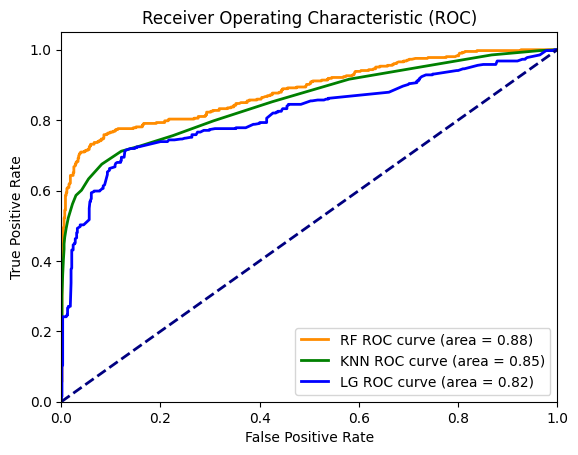

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for rf_optimized
y_pred_proba_rf = rf_optimized.predict_proba(X_test)[:, 1]

# Calculate ROC curve for rf_optimized
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC for rf_optimized
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for knn_optimized
y_pred_proba_knn = knn_optimized.predict_proba(X_test_knn)[:, 1]

# Calculate ROC curve for knn_optimized
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

# Calculate AUC for knn_optimized
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Get predicted probabilities for lg_optimized
y_pred_proba_lg = lg_optimized.predict_proba(X_test_lg)[:, 1]

# Calculate ROC curve for lg_optimized
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_pred_proba_lg)

# Calculate AUC for lg_optimized
roc_auc_lg = auc(fpr_lg, tpr_lg)

# Plot all three ROC curves on the same plot
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label='LG ROC curve (area = %0.2f)' % roc_auc_lg)  # Added lg_optimized
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

if we make voting ensemble with 'soft' voting - we'll expect to get the same results as only using rf_optimized
because the RF ROC is always on top of the other models - meaning it will always win the voting.
While using 'hard' voting will mediate the models resluts, resluting in decreasing the current rf_optimized f1 score.

Therefore, in order to combine effeciently the three models, we should find a more percise way of distinguishing between the areas where RF will be superior and the areas where other. Meaning we would like to create a model that can predict the best model to use on a specific record.

## **Meta-Modeling**

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN_full(BaseEstimator, ClassifierMixin):
    def __init__(self, weighted_features, knn_model):
        self.weighted_features = weighted_features
        self.knn_model = knn_model

    def fit(self, X, y):
        # Fit the knn_model
        X_weighted = X * self.weighted_features
        self.knn_model.fit(X_weighted, y)
        return self

    def predict(self, X):
        # Weight the features and then predict
        X_weighted = X * self.weighted_features
        return self.knn_model.predict(X_weighted)

    def predict_proba(self, X):
        # Weight the features and then predict
        X_weighted = X * self.weighted_features
        return self.knn_model.predict_proba(X_weighted)

# Assuming knn_optimized and weighted_features are already defined
KNN = KNN_full(weighted_features, knn_optimized)

# Fit the classifier to the training data
KNN.fit(X_train, y_train)

# Make predictions on the test data
f1_score(y_test, KNN.predict(X_test))

0.7187039764359352

In [ ]:
class LG_full(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_selection, lg_model):
        self.feature_selection = feature_selection
        self.lg_model = lg_model

    def fit(self, X, y):
        # Filter the features based on feature_selection
        X_filtered = X.iloc[:, [i for i, use_feature in enumerate(self.feature_selection) if use_feature == 1]]

        # Fit the internal lg_model
        self.lg_model.fit(X_filtered, y)
        return self

    def predict(self, X):
        # Filter the features and predict using the lg_model
        X_filtered = X.iloc[:, [i for i, use_feature in enumerate(self.feature_selection) if use_feature == 1]]
        return self.lg_model.predict(X_filtered)

    def predict_proba(self, X):
        # Filter the features and use the lg_model's predict_proba
        X_filtered = X.iloc[:, [i for i, use_feature in enumerate(self.feature_selection) if use_feature == 1]]
        return self.lg_model.predict_proba(X_filtered)

# Assuming lg_optimized and feature_selection are already defined
LG = LG_full(feature_selection, lg_optimized)

# Fit the classifier to the training data
LG.fit(X_train, y_train)

# Make predictions on the test data
f1_score(y_test, LG.predict(X_test))

0.6823529411764706

In [ ]:
RF = rf_optimized

In [ ]:
predictions_results = X_train.copy()
predictions_results['y'] = y_train
predictions_results['rf'] = RF.predict(X_train)
predictions_results['knn'] = KNN.predict(X_train)
predictions_results['lg'] = LG.predict(X_train)
predictions_results['should_not_use_rf'] =  (predictions_results['rf'] != predictions_results['y']) & \
                                          ((predictions_results['knn'] == predictions_results['y']) | (predictions_results['lg']== predictions_results['y']))

predictions_results

,multi_cat__Education_Bachelors,multi_cat__Education_Masters,multi_cat__Education_PHD,multi_cat__JoiningYear_2012,multi_cat__JoiningYear_2013,multi_cat__JoiningYear_2014,multi_cat__JoiningYear_2015,multi_cat__JoiningYear_2016,multi_cat__JoiningYear_2017,multi_cat__JoiningYear_2018,...,multi_cat__Race_white,multi_cat__Race_yellow,binary_cat__Gender_Male,binary_cat__EverBenched_Yes,scaler__Age,y,rf,knn,lg,should_not_use_rf
2400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.70,0,0,0,0,False
2887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.20,1,1,1,1,False
2852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.20,1,1,1,1,False
1213,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.10,0,0,0,0,False
2392,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.55,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.25,0,0,0,0,False
1294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.20,1,1,1,1,False
860,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.55,1,1,1,0,False
3507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.25,1,1,1,1,False


In [ ]:
from imblearn.over_sampling import SMOTE

<ipython-input-294-6f2713667051>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv)


Train CV f1:  0.9800551279658976


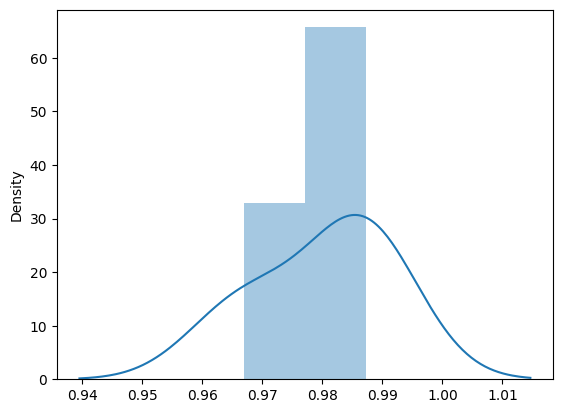

In [ ]:
# meta-modeling
y_should_not_use_rf = predictions_results['should_not_use_rf']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_should_not_use_rf)

meta_model = RandomForestClassifier()
meta_model.fit(X_resampled, y_resampled)

# cross validation
cv = cross_val_score(meta_model, X_resampled, y_resampled, cv=3, scoring="f1")
sns.distplot(cv)
print('Train CV f1: ', cv.mean())

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
class FINAL_MODEL(BaseEstimator, ClassifierMixin):
    def __init__(self, meta_model, rf_model, lg_model, knn_model):
        self.meta_model = meta_model
        self.rf_model = rf_model
        self.lg_model = lg_model
        self.knn_model = knn_model
        # Create VotingClassifier for LG and KNN
        self.voting_classifier = VotingClassifier(estimators=[('lg', self.lg_model), ('knn', self.knn_model)], voting='hard')

    def fit(self, X, y):
        self.voting_classifier.fit(X_train, y_train)
        return self

    def predict(self, X):
        # Predict using the meta-model
        should_not_use_rf_predictions = self.meta_model.predict(X)

        # Initialize an empty list to store final predictions
        final_predictions = []

        # Iterate through each data point in X
        for i in range(X.shape[0]):
            # If meta-model predicts not to use RF
            if should_not_use_rf_predictions[i] == 1:
                # Use hard voting between LG and KNN using VotingClassifier
                final_predictions.append(self.voting_classifier.predict(X.iloc[[i]])[0])
            # If meta-model predicts to use RF
            else:
                # Use RF prediction
                final_predictions.append(self.rf_model.predict(X.iloc[[i]])[0])

        return np.array(final_predictions)

In [ ]:
final_model = FINAL_MODEL(meta_model, RF, LG, KNN)
final_model.fit(X_train, y_train)
print('test f1 score: ', f1_score(y_test, final_model.predict(X_test)))

test f1 score:  0.7742857142857142


# **Generate_results**

In [ ]:
def generate_prediction(data):
  data.drop(columns=['Unnamed: 0', 'id'], inplace=True)
  df_transformed = make_preprocessing(data)
  y_pred = final_model.predict(df_transformed)
  return y_pred